# Outliers

Blog Link:

https://codanics.com/outliers-in-data/

https://codanics.com/handling-outliers-in-data-science-and-machine-learning/

## Step-by-Step Z-Score method to remove outliers

In [1]:
# step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Step 2: Create a DataFrame
data = pd.DataFrame({'Age': [20,21,22,23,24,25,26,27,28,29,30,60]})

<Axes: xlabel='Age', ylabel='Count'>

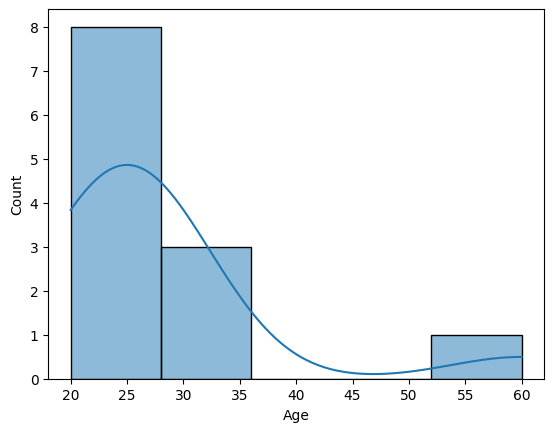

In [2]:
# create histogram
sns.histplot(data['Age'], bins=5, kde=True)

<Axes: ylabel='Age'>

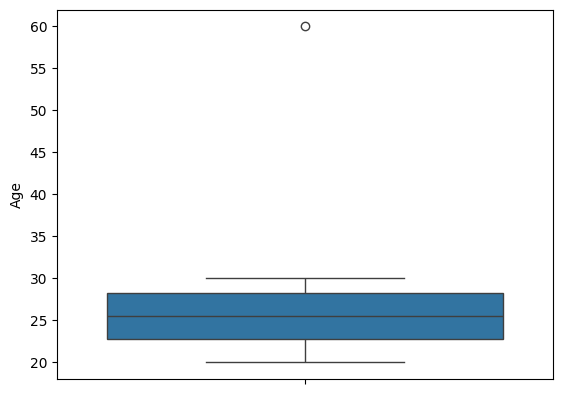

In [3]:
# create boxplot
sns.boxplot(data['Age'])

In [4]:
# Step 3: calculate the means and standard deviation
mean_age = data['Age'].mean()
std_age = data['Age'].std()

data['mean'] = mean_age
data['std'] = std_age

# step 4: calculate the z-scores
data['Z-Score'] = (data['Age'] - mean_age) / std_age
data

,Age,mean,std,Z-Score
0,20,27.916667,10.586942,-0.747777
1,21,27.916667,10.586942,-0.653321
2,22,27.916667,10.586942,-0.558865
3,23,27.916667,10.586942,-0.464409
4,24,27.916667,10.586942,-0.369953
5,25,27.916667,10.586942,-0.275497
6,26,27.916667,10.586942,-0.181041
7,27,27.916667,10.586942,-0.086585
8,28,27.916667,10.586942,0.007871
9,29,27.916667,10.586942,0.102327


In [5]:
# Step 5: print the data
print("Here is data with outliers:")
print(data)

Here is data with outliers:
    Age       mean        std   Z-Score
0    20  27.916667  10.586942 -0.747777
1    21  27.916667  10.586942 -0.653321
2    22  27.916667  10.586942 -0.558865
3    23  27.916667  10.586942 -0.464409
4    24  27.916667  10.586942 -0.369953
5    25  27.916667  10.586942 -0.275497
6    26  27.916667  10.586942 -0.181041
7    27  27.916667  10.586942 -0.086585
8    28  27.916667  10.586942  0.007871
9    29  27.916667  10.586942  0.102327
10   30  27.916667  10.586942  0.196783
11   60  27.916667  10.586942  3.030463


In [6]:
# Step 6: Print outliers
outliers = data[data['Z-Score'].abs() > 3] # considering z-score > 3 as outlier

print(outliers)

    Age       mean        std   Z-Score
11   60  27.916667  10.586942  3.030463


In [7]:
# Step 7: Remove the outliers
data = data[data['Z-Score'].abs() <= 3]

# Step 8: Print the cleaned data
print("Here is data without outliers:")
print(data)

print(data['Age'].mean()) # mean after removing outliers
print(data['Age'].std())  # standard deviation after removing outliers

Here is data without outliers:
    Age       mean        std   Z-Score
0    20  27.916667  10.586942 -0.747777
1    21  27.916667  10.586942 -0.653321
2    22  27.916667  10.586942 -0.558865
3    23  27.916667  10.586942 -0.464409
4    24  27.916667  10.586942 -0.369953
5    25  27.916667  10.586942 -0.275497
6    26  27.916667  10.586942 -0.181041
7    27  27.916667  10.586942 -0.086585
8    28  27.916667  10.586942  0.007871
9    29  27.916667  10.586942  0.102327
10   30  27.916667  10.586942  0.196783
25.0
3.3166247903554


## Z-Score method to remove outliers using Scipy

In [8]:
# Import libraries
import numpy as np
from scipy import stats

# Sample Data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5

# Identify outliers
outliers = np.where(z_scores > threshold) # returns indices of outliers
print(outliers)

outliers_idxs = np.where(z_scores > threshold)[0]  # Get indices of outliers

print("Indices of Outliers:", outliers_idxs)

# Print outlier values using numpy
print("Outlier Values using numpy:", np.array(data)[outliers_idxs])

# Print outliers using inline for loop
print("Outliers using inline for loop:", [data[i] for i in outliers_idxs])
    


# print outliers using for loop
for i in outliers_idxs:
    print(f"Outlier at index {i}: {data[i]}")

# remove outliers from the data
cleaned_data = np.delete(data, outliers_idxs)
print("cleaned_data: ", cleaned_data)

# remove outliers using list comprehension
cleaned_data_list = [data[i] for i in range(len(data)) if i not in outliers_idxs]
print("Cleaned Data using list comprehension:", cleaned_data_list)

(array([9]),)
Indices of Outliers: [9]
Outlier Values using numpy: [110.]
Outliers using inline for loop: [110.0]
Outlier at index 9: 110.0
cleaned_data:  [2.5 2.7 2.8 3.  3.2 3.4 3.6 3.8 4. ]
Cleaned Data using list comprehension: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


# IQR Method to remove outliers

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 3: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 60]})

# Calculate the first and third quartiles
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

# # find Q1, Q3 using numpy
# Q1_numpy = np.percentile(data['Age'], 25)
# Q3_numpy = np.percentile(data['Age'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("Here is the data with outliers:")
print(data)

# Step 7: Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print("Outliers: \n", outliers)

# Step 8: Remove outliers
data_cleaned = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the cleaned data
print("Here is the data without outliers:")
print(data_cleaned)




# K-means algorithm to remove outliers

In [ ]:
# import libraries from scikit-learn for k-means clustering
from sklearn.cluster import KMeans

# Sample Data:
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]] # For clusteting, data should be 2 dimentional - means: atleast 2 features(columns)

# create a KMeans model with 2 clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10) # 
kmeans.fit(data) # fit the model to the data

# predict cluster labels
predicted_labels = kmeans.predict(data)
print("predicted_labels: ", predicted_labels)
# identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(predicted_labels) if label == 1]

# print data
print("data: ", data)
print("outliers: ", outliers)

# remove outliers from the data
cleaned_data = [data[i] for i, label in enumerate(predicted_labels) if label == 0]
print("Data without outliers:", cleaned_data) # print cleaned data

